## Логин на Kaggle.com Anton Helmut

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Переисользуемые Функции

In [2]:


def fill_whatever(df,whatever):
    df.loc[df[whatever].isna(),whatever] = df[whatever].median()
    return df

def fill_Square(df):

    return df

def fill_Square2(df):
    df.loc[df['LifeSquare'] > df['Square'],'Square'] = df['LifeSquare']
    return df

def fill_KitchenSquare(df):
    df.loc[df['KitchenSquare'] < 5,'KitchenSquare'] = 5
    df.loc[df['KitchenSquare'] > 25,'KitchenSquare'] = 25
    return df


def fill_LifeSquare(df):
    df.loc[df['LifeSquare'].isna() ,'LifeSquare'] = df['Square'] - df['KitchenSquare']
    df.loc[(df['KitchenSquare'] + df['LifeSquare'])>df['Square'],'LifeSquare'] = df['Square'] - df['KitchenSquare']
    df.loc[(df['LifeSquare'])<df['Square']/4,'LifeSquare'] = df['Square'] - df['KitchenSquare']
    return df



def replace_chars_to_nums(df):
    df['Ecology_2'] = df['Ecology_2'].replace({'A':0, 'B':1})
    df['Ecology_3'] = df['Ecology_3'].replace({'A':0, 'B':1})
    df['Shops_2'] = df['Shops_2'].replace({'A':0, 'B':1})
    return df

def fill_Healthcare_1(df):
    df.loc[df['Healthcare_1'].isna(),'Healthcare_1'] = df['Healthcare_1'].median()
    return df

def add_SquareMPrice(df):
    df['SquareMPrice'] = df['Price']/df['Square']
    return df

def add_DistrSquareMPrice(df,train_df):
    DistrSquareMPrice = train_df.groupby(['DistrictId'], as_index=False).agg({'SquareMPrice':'median'}).rename(columns={'SquareMPrice':'MedSQMPrByDist'})
    df = df.merge(DistrSquareMPrice, on=['DistrictId'], how='left')
    return df

def fill_HouseYear(df):
    df.loc[df['HouseYear'] > 2020 ,'HouseYear'] = 2020
    df.loc[df['HouseYear'] < 1900 ,'HouseYear'] = 1900
    return df

def fill_HouseFloor_and_Floor(df):
    df.loc[df['HouseFloor']<df['Floor'],'HouseFloor'] = 0
    df.loc[df['HouseFloor']<df['Floor'],'Floor'] = 0
    df.loc[df['HouseFloor']==0,'HouseFloor'] = df['HouseFloor'].median()
    df.loc[df['HouseFloor']==0,'Floor'] = df['Floor'].median()
    df.loc[df['HouseFloor']>40,'HouseFloor'] = 40
#    df.loc[df['HouseFloor']<df['Floor'],'HouseFloor']
    return df

def plot_data(X, Y,X_label,Y_label):

    plt.figure(figsize=(12,12))
    sns.scatterplot(x=X, y=Y)
    plt.xlabel(X_label)
    plt.ylabel(Y_label)
 
    plt.show()

In [3]:
data_train = pd.read_csv('C:/Users/a.helmut/OneDrive/Documents/Geekbrains/Python 2/DATA/train.csv')
print(data_train.shape)


(10000, 20)


In [4]:
data_train.head(5)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


### Обработаем выбросы и пустые значения

In [5]:
data_train.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [6]:
data_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


##### Price (Ничего особенного найти не удалось)

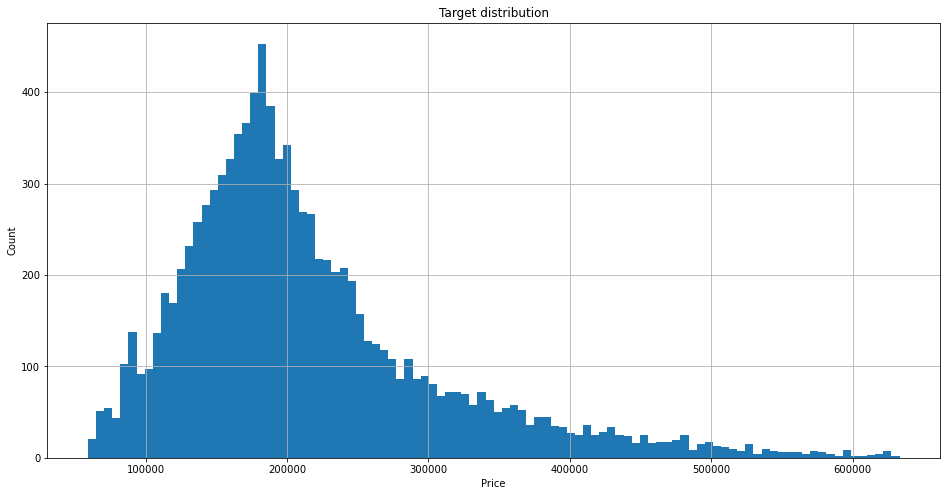

In [7]:
plt.figure(figsize = (16, 8))

data_train['Price'].hist(bins=100)
plt.ylabel('Count')
plt.title('Target distribution')
plt.xlabel('Price')

plt.show()

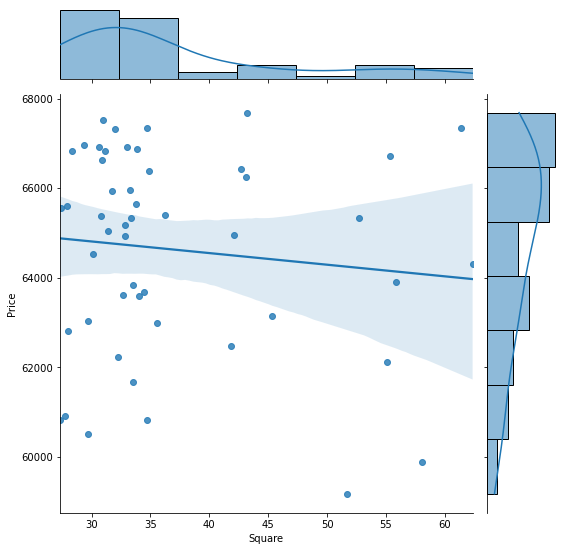

In [8]:
# Посмотрим на точки ниже квантиля 0.005 
grid = sns.jointplot(data_train.loc[data_train['Price']<np.quantile(data_train['Price'],0.005),'Square'], data_train.loc[data_train['Price']<np.quantile(data_train['Price'],0.005),'Price'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

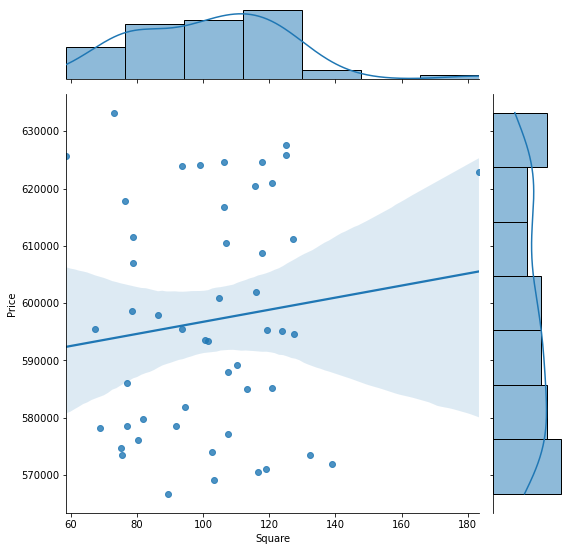

In [9]:
# Посмотрим на точки выше квантиля 0.995 
grid = sns.jointplot(data_train.loc[data_train['Price']>np.quantile(data_train['Price'],0.995),'Square'], data_train.loc[data_train['Price']>np.quantile(data_train['Price'],0.995),'Price'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

#### Square, LifeSquare, KitchenSquare

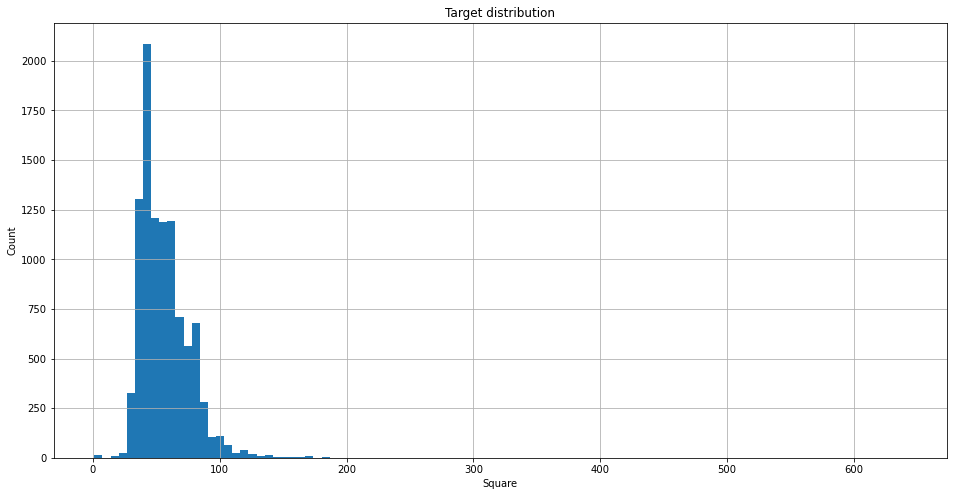

In [10]:
plt.figure(figsize = (16, 8))

data_train['Square'].hist(bins=100)
plt.ylabel('Count')
plt.title('Target distribution')
plt.xlabel('Square')

plt.show()

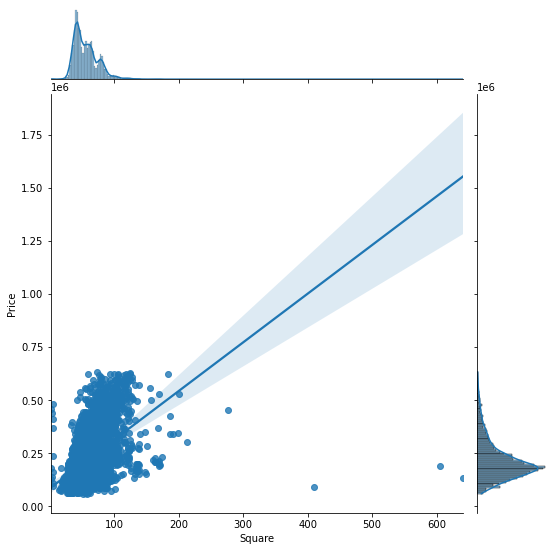

In [11]:
# Посмотрим на корреляцию площади и цены объекта

grid = sns.jointplot(data_train['Square'], data_train['Price'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

In [12]:
print(np.quantile(data_train['Square'],0.995))
print(np.quantile(data_train['Square'],0.005))

132.82090134811978
27.245409330530855


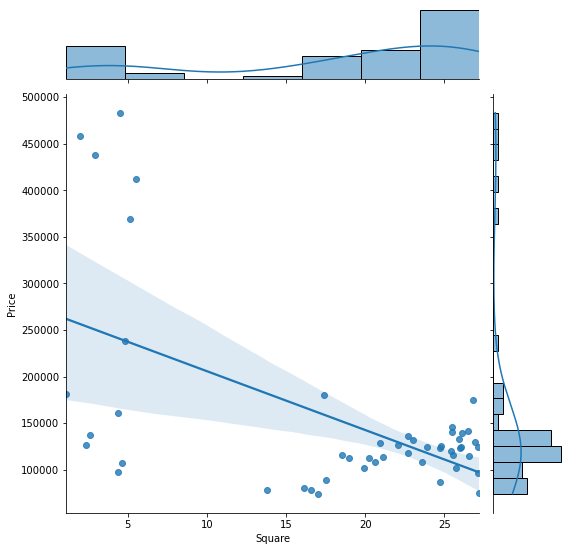

In [13]:
# Посмотрим на точки ниже  квантиля 0.005 
grid = sns.jointplot(data_train.loc[data_train['Square']<np.quantile(data_train['Square'],0.005),'Square'], data_train.loc[data_train['Square']<np.quantile(data_train['Square'],0.005),'Price'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

In [14]:
data_train.loc[data_train['Square']<10]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
161,6782,45,1.0,2.954309,5.257278,1.0,3,1.0,1977,0.195781,B,B,23,5212,6,NaN,3,2,B,438005.182323
328,4504,27,3.0,4.390331,5.610772,1.0,8,19.0,2016,0.211401,B,B,9,1892,0,NaN,0,1,B,161379.067034
1401,9487,5,1.0,5.129222,5.549458,1.0,1,1.0,1977,0.150818,B,B,16,3433,4,2643.0,4,5,B,369472.403061
4496,15744,34,1.0,1.988943,2.642219,1.0,21,4.0,1977,0.069753,B,B,53,13670,4,NaN,1,11,B,458378.777006
4800,7657,38,1.0,4.502784,4.618547,1.0,28,1.0,1977,0.060753,B,B,15,2787,2,520.0,0,7,B,483283.488083
5009,11526,27,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B,107604.269441
7033,1748,88,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,NaN,3,9,B,412511.088764
7470,14786,1,1.0,1.136859,4.525736,1.0,3,1.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,181434.825589
8572,10202,6,1.0,2.596351,4.604943,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,137597.601458
8805,10527,27,1.0,4.380726,40.805837,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,NaN,0,1,B,97560.720383


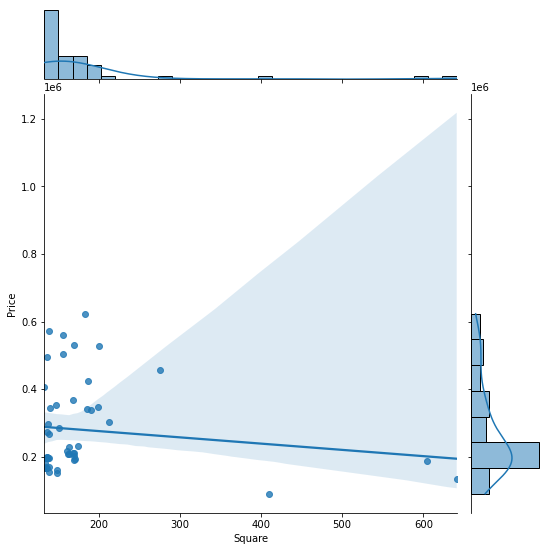

In [15]:
# Посмотрим на точки выше квантиля 0.995 
grid = sns.jointplot(data_train.loc[data_train['Square']>np.quantile(data_train['Square'],0.995),'Square'], data_train.loc[data_train['Square']>np.quantile(data_train['Square'],0.995),'Price'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

In [16]:
data_train.loc[data_train['Square']>250]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
726,28,9,2.0,604.705972,NaN,1.0,17,18.0,1977,0.161532,B,B,25,5648,1,30.0,2,4,B,187717.242538
1906,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,4508.0,3,7,B,455264.882666
7010,2307,102,1.0,409.425181,410.639749,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,705.0,3,6,B,90470.430830
9229,11602,30,2.0,641.065193,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,1046.0,3,23,B,133529.681562


In [17]:
# Уберем из обучающей выборки эти данные

data_train = data_train.loc[data_train['Square']>10]
data_train = data_train.loc[data_train['Square']<350]


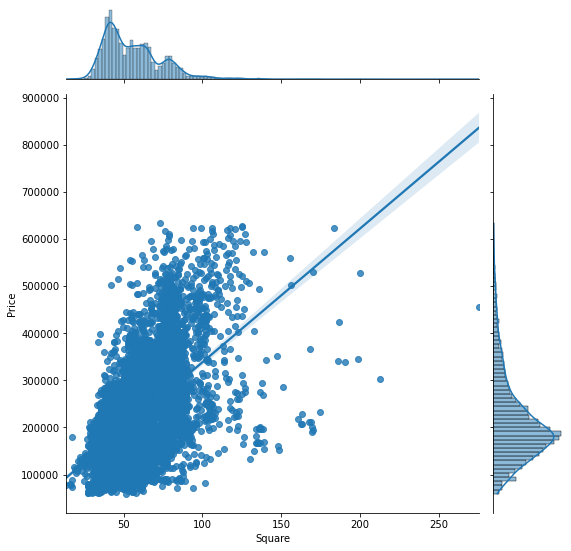

In [18]:
# Посмотрим на корреляцию площади и цены объекта

grid = sns.jointplot(data_train['Square'], data_train['Price'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

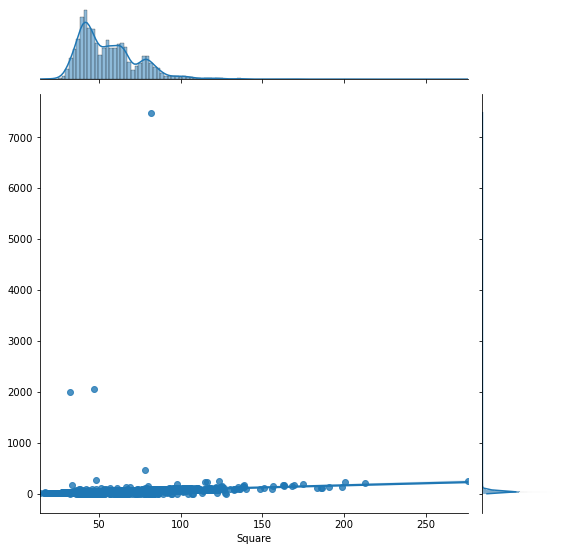

In [19]:
# Посмотрим на корреляцию площади и жилой площади+площади кухни 

grid = sns.jointplot(data_train['Square'], data_train['KitchenSquare'] + data_train['LifeSquare'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

In [20]:
data_train.loc[(data_train['KitchenSquare'] + data_train['LifeSquare'])>1000,['Square','LifeSquare','KitchenSquare','HouseYear']]

,Square,LifeSquare,KitchenSquare,HouseYear
6505,32.276663,19.278394,1970.0,1977
8000,81.694417,7480.592129,1.0,2016
9520,47.100719,46.447960,2014.0,2014


In [21]:
# Тут явно ошибки в данных. Год ввели вместо площади кухни.
data_train.loc[(data_train['KitchenSquare'] + data_train['LifeSquare'])>1000,['LifeSquare','KitchenSquare']] = 0

In [22]:
data_train.loc[(data_train['KitchenSquare'] + data_train['LifeSquare'])>data_train['Square'],['Square','LifeSquare','KitchenSquare']]

,Square,LifeSquare,KitchenSquare
33,73.314975,74.131261,1.0
34,58.783661,55.441256,11.0
42,53.179791,50.643797,5.0
48,40.064914,38.733288,8.0
64,87.200625,87.730225,0.0
...,...,...,...
9960,96.056784,98.152802,1.0
9962,42.029175,44.682167,10.0
9979,40.043234,41.984322,1.0
9987,62.690057,64.602939,10.0


In [23]:
# Очевидно lifeSquare не может быть больше Square

data_train = fill_Square2(data_train)

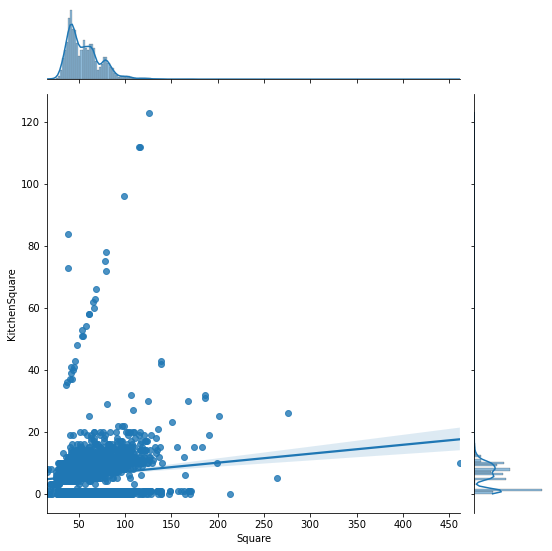

In [24]:
# В LifeSquare много пропусков, потому посмотрим сначала KitchenSquare, затем вычеслим LifeSquare = Square - KitchenSquare 

# Посмотрим на корреляцию площади и площади кухни 

grid = sns.jointplot(data_train['Square'], data_train['KitchenSquare'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

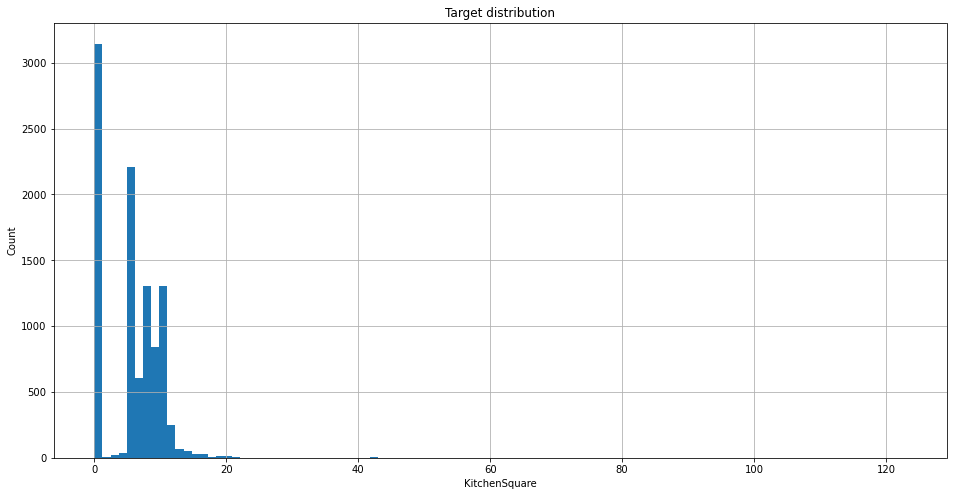

In [25]:
# Посмотрим на 'KitchenSquare' 
plt.figure(figsize = (16, 8))

data_train['KitchenSquare'].hist(bins=100)
plt.ylabel('Count')
plt.title('Target distribution')
plt.xlabel('KitchenSquare')
plt.show()

In [26]:
data_train['KitchenSquare'].value_counts()

1.0      2448
8.0      1306
5.0      1169
10.0     1073
6.0      1038
9.0       843
0.0       698
7.0       609
12.0      249
11.0      233
13.0       67
14.0       51
4.0        39
15.0       31
3.0        22
16.0       16
20.0       14
17.0       12
19.0       11
18.0        6
2.0         4
22.0        3
112.0       2
51.0        2
58.0        2
37.0        2
32.0        2
41.0        2
43.0        2
30.0        2
25.0        2
23.0        1
62.0        1
123.0       1
40.0        1
48.0        1
21.0        1
72.0        1
27.0        1
63.0        1
78.0        1
29.0        1
66.0        1
31.0        1
35.0        1
73.0        1
42.0        1
60.0        1
84.0        1
39.0        1
26.0        1
54.0        1
36.0        1
53.0        1
96.0        1
75.0        1
Name: KitchenSquare, dtype: int64

In [27]:


data_train = fill_KitchenSquare(data_train)

In [28]:


data_train = fill_LifeSquare(data_train)

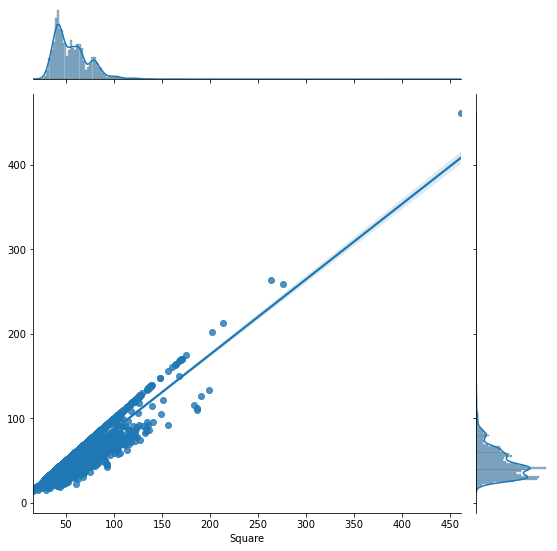

In [29]:
grid = sns.jointplot(data_train['Square'], data_train['KitchenSquare'] + data_train['LifeSquare'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

#### HouseYear

In [30]:
data_train['HouseYear'].value_counts()

1977        2642
2017         308
2016         303
2015         299
2014         209
            ... 
1928           1
1947           1
1914           1
4968           1
20052011       1
Name: HouseYear, Length: 97, dtype: int64

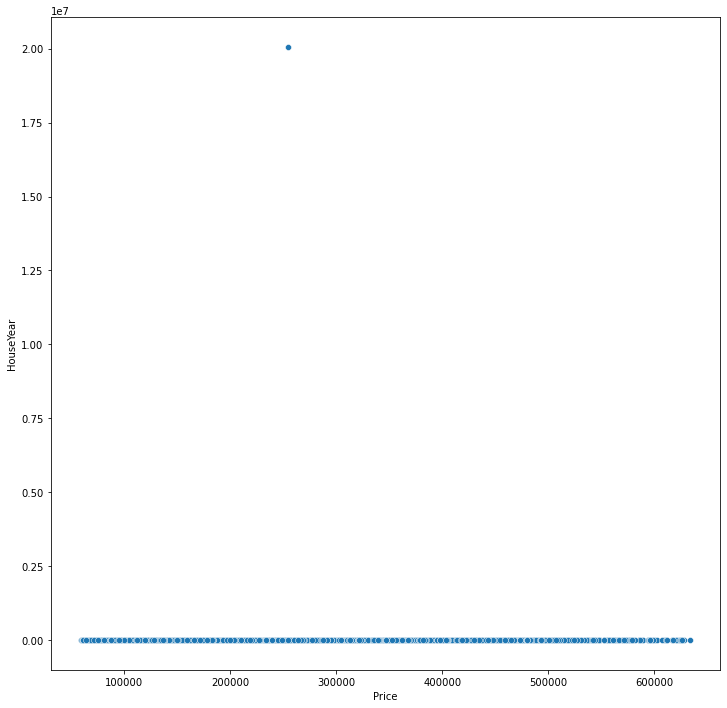

In [31]:

plot_data(data_train['Price'], data_train['HouseYear'],'Price', 'HouseYear')

In [32]:
# Виден выброс 20052011, уберем его отдельно
data_train.loc[data_train['HouseYear'] == 20052011,'HouseYear'] = 2011
data_train = fill_HouseYear(data_train)

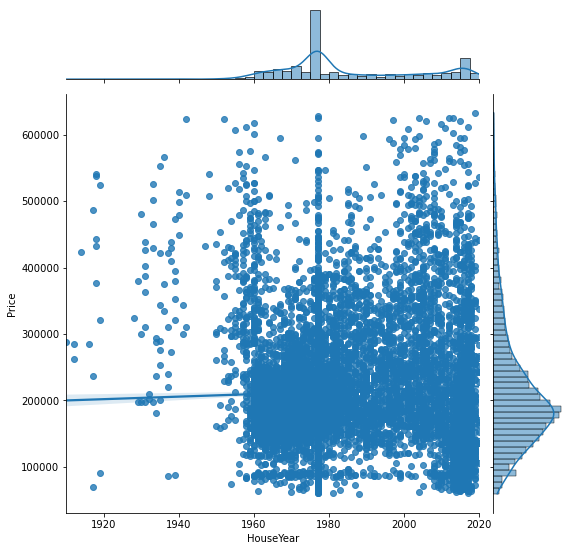

In [33]:
grid = sns.jointplot(data_train['HouseYear'], data_train['Price'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)
#plot_data(data_train['Price'], data_train['HouseYear'])

#### Social_1	Social_2	Social_3 (здесь по картинкам ничего особенного не видно)

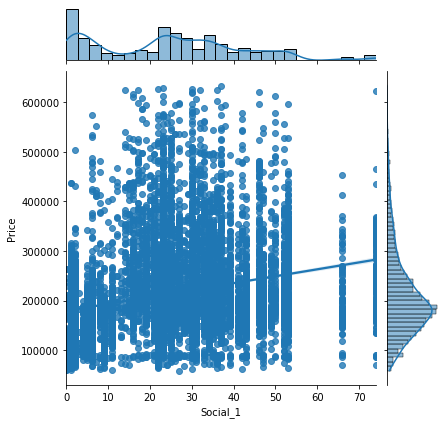

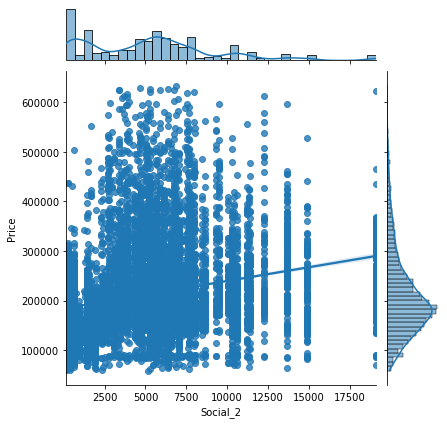

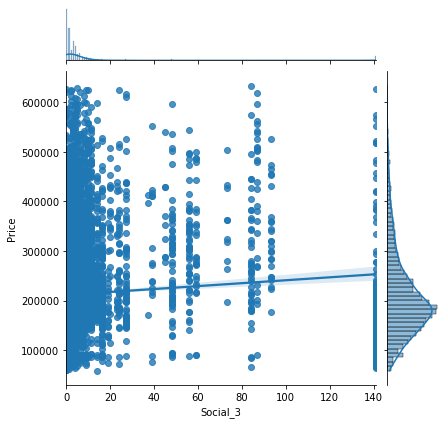

In [34]:
sns.jointplot(data=data_train, x='Social_1', y='Price', kind='reg')
sns.jointplot(data=data_train, x='Social_2', y='Price', kind='reg')
sns.jointplot(data=data_train, x='Social_3', y='Price', kind='reg')


#### Floor, HouseFloor

In [35]:
data_train['HouseFloor'].value_counts()

17.0     2329
9.0      1389
12.0     1074
5.0      1031
14.0      625
16.0      576
1.0       492
25.0      373
22.0      342
0.0       268
24.0      176
8.0       141
10.0      135
4.0       132
3.0       127
15.0      123
19.0      106
20.0      105
18.0       88
7.0        59
6.0        58
2.0        48
23.0       40
21.0       33
11.0       28
13.0       27
30.0       21
40.0        7
27.0        6
37.0        4
32.0        4
28.0        3
39.0        2
48.0        2
99.0        2
29.0        1
44.0        1
47.0        1
36.0        1
31.0        1
38.0        1
117.0       1
45.0        1
26.0        1
Name: HouseFloor, dtype: int64

In [36]:
data_train['Floor'].value_counts()

4     948
5     876
3     869
6     801
7     759
8     642
9     604
2     588
10    552
11    457
12    438
13    398
14    362
16    290
15    287
17    255
1     233
18    184
19    121
20     67
21     58
22     54
24     52
25     34
23     25
26     18
27      5
28      2
32      2
42      1
37      1
33      1
31      1
Name: Floor, dtype: int64

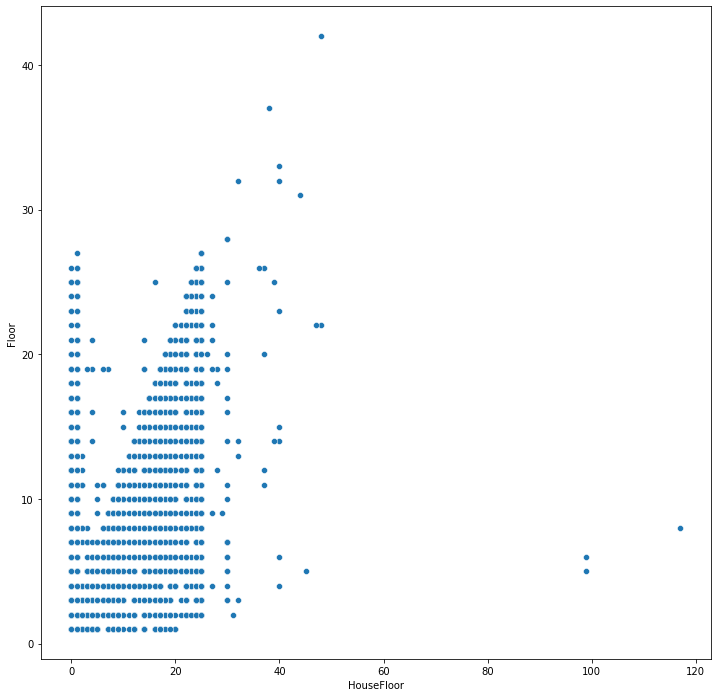

In [37]:
plot_data(data_train['HouseFloor'],data_train['Floor'],'HouseFloor','Floor')

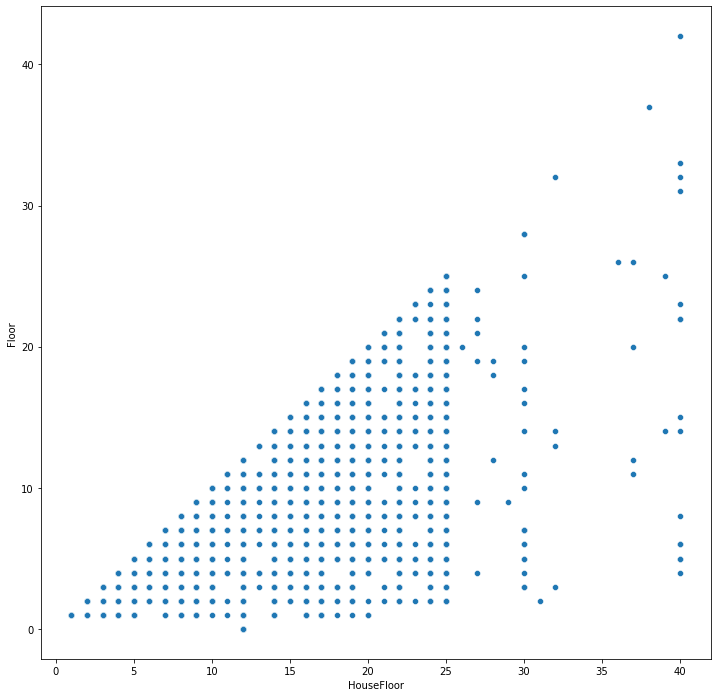

In [38]:

data_train = fill_HouseFloor_and_Floor(data_train)

plot_data(data_train['HouseFloor'],data_train['Floor'],'HouseFloor','Floor')

#### Rooms

#### Healthcare

In [39]:
data_train = fill_Healthcare_1(data_train)

In [40]:
data_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,9985.000000,9985.000000,9985.000000,9985.000000,9985.000000,9985.000000,9985.000000,9985.000000,9985.000000,9985.000000,9985.000000,9985.000000,9985.000000,9985.00000,9985.000000,9985.000000,9985.000000
mean,8383.644266,50.429745,1.891237,56.379720,40.476415,7.105558,6.576565,13.648673,1984.863996,0.118864,24.698648,5354.516575,8.034552,1026.54031,1.319579,4.230546,214097.678076
std,4859.124846,43.599915,0.839354,19.655174,19.355346,2.670709,5.475595,5.247515,18.414099,0.119063,17.533605,4006.985966,23.811348,746.93212,1.493617,4.804400,92774.269739
min,0.000000,0.000000,0.000000,15.988889,8.698571,5.000000,0.000000,1.000000,1910.000000,0.000000,0.000000,168.000000,0.000000,0.00000,0.000000,0.000000,59174.778028
25%,4170.000000,20.000000,1.000000,41.881832,26.991752,5.000000,2.000000,10.000000,1974.000000,0.017647,6.000000,1564.000000,0.000000,830.00000,0.000000,1.000000,153912.044504
50%,8394.000000,36.000000,2.000000,52.653623,35.962899,6.000000,5.000000,12.000000,1977.000000,0.075424,25.000000,5285.000000,2.000000,900.00000,1.000000,3.000000,192302.751941
75%,12594.000000,75.000000,2.000000,66.001555,49.134125,9.000000,10.000000,17.000000,2001.000000,0.195781,36.000000,7227.000000,5.000000,990.00000,2.000000,6.000000,249114.537525
max,16798.000000,209.000000,19.000000,461.463614,451.463614,25.000000,42.000000,40.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.00000,6.000000,23.000000,633233.466570


### Заменим символы на цифры

In [41]:

data_train = replace_chars_to_nums(data_train)
data_train[['Ecology_2','Ecology_3', 'Shops_2']]

,Ecology_2,Ecology_3,Shops_2
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1
...,...,...,...
9995,1,1,1
9996,1,1,0
9997,1,1,1
9998,1,1,1


### Добавим цену квадратного метра и среднюю цену квадратного метра по району.

In [42]:
data_train = add_SquareMPrice(data_train)

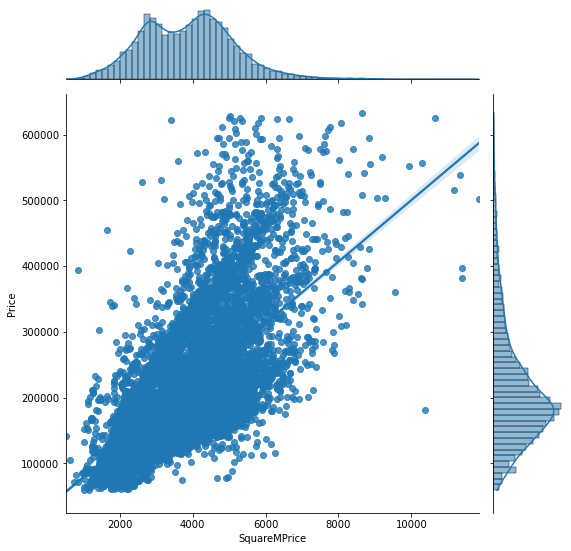

In [43]:
# Посмотрим на корреляцию цены М2 и цены объекта

grid = sns.jointplot(data_train['SquareMPrice'], data_train['Price'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

In [44]:

data_train = add_DistrSquareMPrice(data_train,data_train)


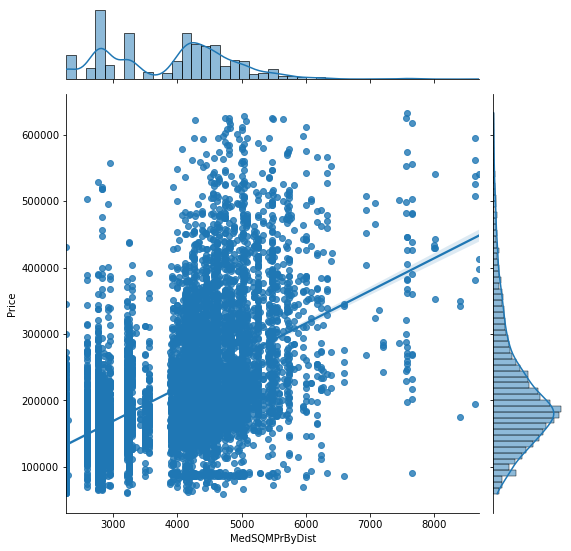

In [45]:
# Посмотрим на корреляцию медианной цены М2 по району и цены объекта

grid = sns.jointplot(data_train['MedSQMPrByDist'], data_train['Price'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

In [46]:
data_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,SquareMPrice,MedSQMPrByDist
count,9985.000000,9985.000000,9985.000000,9985.000000,9985.000000,9985.000000,9985.000000,9985.000000,9985.000000,9985.000000,...,9985.000000,9985.000000,9985.000000,9985.00000,9985.000000,9985.000000,9985.000000,9985.000000,9985.000000,9985.000000
mean,8383.644266,50.429745,1.891237,56.379720,40.476415,7.105558,6.576565,13.648673,1984.863996,0.118864,...,24.698648,5354.516575,8.034552,1026.54031,1.319579,4.230546,0.917376,214097.678076,3885.204432,3922.755017
std,4859.124846,43.599915,0.839354,19.655174,19.355346,2.670709,5.475595,5.247515,18.414099,0.119063,...,17.533605,4006.985966,23.811348,746.93212,1.493617,4.804400,0.275327,92774.269739,1248.984997,998.499171
min,0.000000,0.000000,0.000000,15.988889,8.698571,5.000000,0.000000,1.000000,1910.000000,0.000000,...,0.000000,168.000000,0.000000,0.00000,0.000000,0.000000,0.000000,59174.778028,537.979605,2268.978053
25%,4170.000000,20.000000,1.000000,41.881832,26.991752,5.000000,2.000000,10.000000,1974.000000,0.017647,...,6.000000,1564.000000,0.000000,830.00000,0.000000,1.000000,1.000000,153912.044504,2910.144968,2918.726774
50%,8394.000000,36.000000,2.000000,52.653623,35.962899,6.000000,5.000000,12.000000,1977.000000,0.075424,...,25.000000,5285.000000,2.000000,900.00000,1.000000,3.000000,1.000000,192302.751941,3905.102814,4133.475318
75%,12594.000000,75.000000,2.000000,66.001555,49.134125,9.000000,10.000000,17.000000,2001.000000,0.195781,...,36.000000,7227.000000,5.000000,990.00000,2.000000,6.000000,1.000000,249114.537525,4689.569352,4562.026777
max,16798.000000,209.000000,19.000000,461.463614,451.463614,25.000000,42.000000,40.000000,2020.000000,0.521867,...,74.000000,19083.000000,141.000000,4849.00000,6.000000,23.000000,1.000000,633233.466570,11854.652892,8700.768533


In [47]:
data_train.isna().sum()

Id                0
DistrictId        0
Rooms             0
Square            0
LifeSquare        0
KitchenSquare     0
Floor             0
HouseFloor        0
HouseYear         0
Ecology_1         0
Ecology_2         0
Ecology_3         0
Social_1          0
Social_2          0
Social_3          0
Healthcare_1      0
Helthcare_2       0
Shops_1           0
Shops_2           0
Price             0
SquareMPrice      0
MedSQMPrByDist    0
dtype: int64

### Прогноз
#### Будем прогнозировать цену квадратного метра, затем умножать на площадь.

In [48]:
def fill_X(df):
    X = df[[
    'Rooms',
    'Square',
    'LifeSquare',
    'KitchenSquare',
    'Floor',
    'HouseFloor',
    'HouseYear',
    'Ecology_1',
    'Ecology_2',
    'Ecology_3',
    'Social_1',
    'Social_2',
    'Social_3',
    'Healthcare_1',
    'Helthcare_2',
    'Shops_1',
    'Shops_2',
    'MedSQMPrByDist']]
    
    return X

def fill_Y(df):
    Y = data_train[['SquareMPrice']]
    return Y

X = fill_X(data_train)
y = fill_Y(data_train) 

y.head(5)

,SquareMPrice
0,2651.708272
1,4462.045990
2,3600.596698
3,4160.019670
4,5351.088794


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (7988, 18)
X_test (1997, 18)
y_train (7988, 1)
y_test (1997, 1)


### Линейная регрессия

In [50]:


lr = LinearRegression().fit(X_train, y_train)
y_predict = lr.predict(X_test)
r2_score(y_test, y_predict)


0.6037692644804166

### Случайны лес

In [51]:

rf_model = RandomForestRegressor(max_depth=16, min_samples_split=100, n_estimators=500, n_jobs=-1, random_state=42)
rf_model.fit(X_train, y_train)
y_predict = rf_model.predict(X_test)
r2_score(y_test, y_predict)

0.6544158434741913

In [52]:
y_test_price = y_test['SquareMPrice'] * X_test['Square']
y_predict_price = y_predict * X_test['Square']
r2_score(y_test_price, y_predict_price)

0.7393798018860884

In [53]:
feature_importances = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
17,MedSQMPrByDist,0.795703
1,Square,0.063972
2,LifeSquare,0.022417
6,HouseYear,0.021121
10,Social_1,0.018755
5,HouseFloor,0.018308
11,Social_2,0.011243
3,KitchenSquare,0.008572
7,Ecology_1,0.008285
13,Healthcare_1,0.008086


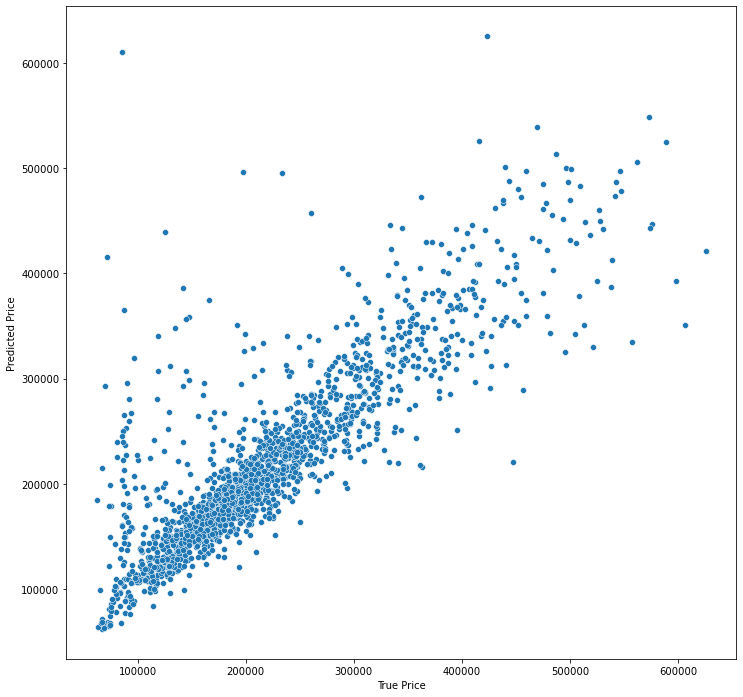

In [54]:
plot_data(y_test_price, y_predict_price, 'True Price', 'Predicted Price')

### Прогноз 2

###### Прогнозирую цену объекта. (R2 получился хуже чем в при первом подходе, потому результат далее использовать не буду)

In [55]:
def fill_X2(df):
    X = df[[
    'Rooms',
    'Square',
    'LifeSquare',
    'KitchenSquare',
    'Floor',
    'HouseFloor',
    'HouseYear',
    'Ecology_1',
    'Ecology_2',
    'Ecology_3',
    'Social_1',
    'Social_2',
    'Social_3',
    'Healthcare_1',
    'Helthcare_2',
    'Shops_1',
    'Shops_2',
    'MedSQMPrByDist']]
    
    return X

def fill_Y2(df):
    Y = data_train[['Price']]
    return Y

X2 = fill_X2(data_train)
y2 = fill_Y2(data_train) 

y2.head(5)

,Price
0,305018.871089
1,177734.553407
2,282078.720850
3,168106.007630
4,343995.102962


In [56]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)
print('X_train2', X_train.shape)
print('X_test2', X_test.shape)
print('y_train2', y_train.shape)
print('y_test2', y_test.shape)

X_train2 (7988, 18)
X_test2 (1997, 18)
y_train2 (7988, 1)
y_test2 (1997, 1)


In [57]:
# Линейная регрессия
lr2 = LinearRegression().fit(X_train2, y_train2)
y_predict2 = lr.predict(X_test2)
r2_score(y_test2, y_predict2)

-5.088091309754975

In [58]:
# Случайный лес
rf_model2 = RandomForestRegressor(max_depth=13, min_samples_split=100, n_estimators=500, n_jobs=-1, random_state=42)
rf_model2.fit(X_train2, y_train2)
y_predict2 = rf_model2.predict(X_test2)
r2_score(y_test2, y_predict2)

0.7323376105866488

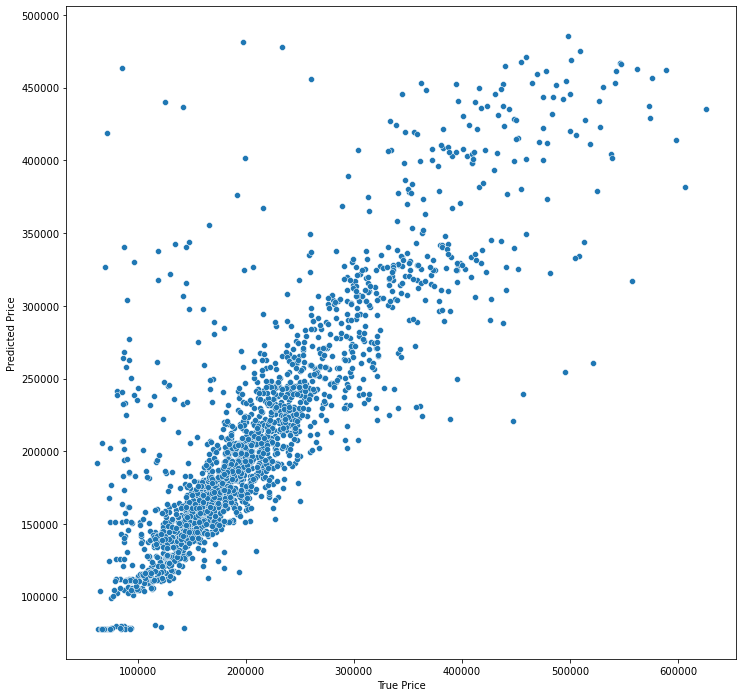

In [59]:
plot_data(y_test_price, y_predict2,'True Price', 'Predicted Price')

### Сделаем прогноз для тестовой выборки

In [60]:
data_test = pd.read_csv('C:/Users/a.helmut/OneDrive/Documents/Geekbrains/Python 2/DATA/test.csv')

print(data_test.shape)

(5000, 19)


In [61]:
data_test.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       1041
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     2377
Helthcare_2         0
Shops_1             0
Shops_2             0
dtype: int64

In [62]:
# Преобразуем тестовый набор данных

data_test = fill_Square(data_test)
data_test = fill_Square2(data_test)
data_test = fill_KitchenSquare(data_test)
data_test = fill_LifeSquare(data_test)
data_test = fill_Healthcare_1(data_test)
data_test = fill_HouseYear(data_test)
data_test = fill_HouseFloor_and_Floor(data_test)
data_test = replace_chars_to_nums(data_test)
#data_test = add_SquareMPrice(data_test)
data_test = add_DistrSquareMPrice(data_test,data_train)
data_test = fill_whatever(data_test, 'MedSQMPrByDist')



In [63]:
data_test.isna().sum()

Id                0
DistrictId        0
Rooms             0
Square            0
LifeSquare        0
KitchenSquare     0
Floor             0
HouseFloor        0
HouseYear         0
Ecology_1         0
Ecology_2         0
Ecology_3         0
Social_1          0
Social_2          0
Social_3          0
Healthcare_1      0
Helthcare_2       0
Shops_1           0
Shops_2           0
MedSQMPrByDist    0
dtype: int64

In [64]:

X_for_prediction = fill_X(data_test)

In [65]:
y_predict_for_submission = rf_model.predict(X_for_prediction)

In [66]:
y_predict_price_for_submission = y_predict_for_submission * X_for_prediction['Square']

In [67]:
y_predict_price_for_submission

0       170921.772441
1       118583.812480
2       143182.546849
3       104698.195565
4       178819.179882
            ...      
4995    171755.051907
4996    383538.149180
4997    149228.821151
4998    181774.511040
4999    258972.327356
Name: Square, Length: 5000, dtype: float64

### Сформируем файл для загрузки

In [68]:
data_for_submission = pd.DataFrame(columns=['Id','Price'])
data_for_submission['Id'] = data_test['Id']
data_for_submission['Price'] = y_predict_price_for_submission

data_for_submission

,Id,Price
0,4567,170921.772441
1,5925,118583.812480
2,960,143182.546849
3,3848,104698.195565
4,746,178819.179882
...,...,...
4995,10379,171755.051907
4996,16138,383538.149180
4997,3912,149228.821151
4998,5722,181774.511040


In [69]:
data_for_submission.to_csv('./data_for_submission.csv',index=False)